In [1]:
# 1
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.keys())

X =  data['data']
y = data['target']
print(X.shape)
print(y.shape) 
print("List of Feature Names = ", data['feature_names'])
print("Output Classes = ", data['target_names'])

dict_keys(['target', 'filename', 'feature_names', 'data', 'DESCR', 'target_names'])
(569, 30)
(569,)
List of Feature Names =  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Output Classes =  ['malignant' 'benign']


In [2]:
# 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print ("Number of examples in training set = ", X_train.shape[0])
print ("Number of examples in test set = ", X_test.shape[0])

(398, 30)
(398,)
(171, 30)
(171,)
Number of examples in training set =  398
Number of examples in test set =  171


In [3]:
# 3
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [4]:
# 4
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

# Random initialization method and the seed for initializing model parameters
my_init = RandomUniform(minval=-0.05, maxval=0.05, seed=0)

classifier = Sequential()
classifier.add(Dense(units = 16, kernel_initializer = my_init, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, kernel_initializer = my_init, activation = 'relu'))
classifier.add(Dense(units = 4, kernel_initializer = my_init, activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = my_init, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=classifier.fit(X_train, y_train, batch_size = 5, epochs = 100, validation_data=(X_test, y_test))


Using TensorFlow backend.


Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 5s 12ms/step - loss: 0.6807 - acc: 0.6256 - val_loss: 0.6276 - val_acc: 0.6316
Epoch 2/100
398/398 [==============================] - 0s 907us/step - loss: 0.4513 - acc: 0.6281 - val_loss: 0.3587 - val_acc: 0.9415
Epoch 3/100
398/398 [==============================] - 0s 897us/step - loss: 0.3206 - acc: 0.9598 - val_loss: 0.3080 - val_acc: 0.9591
Epoch 4/100
398/398 [==============================] - 0s 915us/step - loss: 0.2662 - acc: 0.9774 - val_loss: 0.2103 - val_acc: 0.9766
Epoch 5/100
398/398 [==============================] - 0s 895us/step - loss: 0.1354 - acc: 0.9799 - val_loss: 0.1035 - val_acc: 0.9708
Epoch 6/100
398/398 [==============================] - 0s 907us/step - loss: 0.0830 - acc: 0.9849 - val_loss: 0.0788 - val_acc: 0.9766
Epoch 7/100
398/398 [==============================] - 0s 917us/step - loss: 0.0706 - acc: 0.9849 - val_loss: 0.0712 - val_acc: 0.9766
Epoch 8/10

Epoch 61/100
398/398 [==============================] - 0s 915us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.2385 - val_acc: 0.9649
Epoch 62/100
398/398 [==============================] - 0s 895us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.2398 - val_acc: 0.9649
Epoch 63/100
398/398 [==============================] - 0s 910us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.2378 - val_acc: 0.9649
Epoch 64/100
398/398 [==============================] - 0s 887us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.2406 - val_acc: 0.9649
Epoch 65/100
398/398 [==============================] - 0s 885us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.2393 - val_acc: 0.9649
Epoch 66/100
398/398 [==============================] - 0s 900us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.2367 - val_acc: 0.9649
Epoch 67/100
398/398 [==============================] - 0s 905us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2365 - val_acc: 0.9649
Epoch 68/100
398/398 [==========================

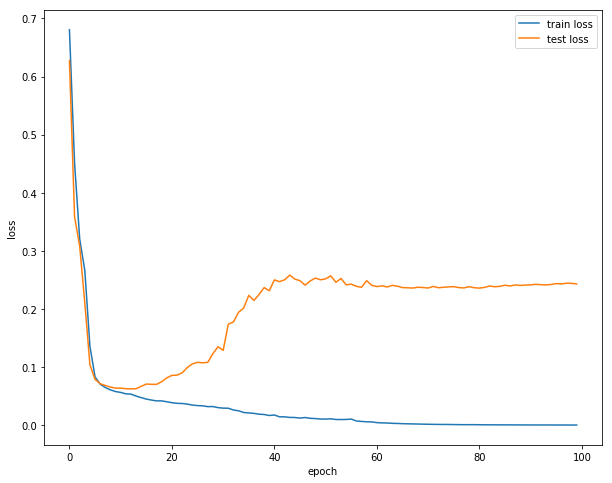

In [6]:
# 5
import matplotlib.pyplot as plt 
import matplotlib

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

In [7]:
print("Best Accuracy on training set = ", max(history.history['acc']))
print("Best Accuray on test set = ", max(history.history['val_acc']))

Best Accuracy on training set =  1.0
Best Accuray on test set =  0.9824561413965727
